<h2>Calcolo della massima portata in un nodo</h2>
(E' necessario aver svolto le simulazioni per tutti i tempi di pioggia)

Si carica la libreria che consente di conoscere e scegliere la directory di lavoro

In [19]:
import os
os.getcwd()

'C:\\Users\\anzo5\\Desktop\\fognatura\\nodes\\csv'

Si interroga ora la lista dei file presenti nella nuova directory di lavoro. Se corretta sono presenti le cartelle relative alle simulazioni per ogni tempo di pioggia. (5mins, 10mins,...)

In [20]:
os.listdir()

['.~lock.n05.csv#',
 'n00.csv',
 'n01.csv',
 'n02.csv',
 'n03.csv',
 'n04.csv',
 'n05.csv',
 'n06.csv',
 'n07.csv',
 'n08.csv',
 'n09.csv',
 'n10.csv',
 'n11.csv',
 'n12.csv',
 'n13.csv',
 'n14.csv',
 'n15.csv',
 'n16.csv',
 'n17.csv',
 'n18.csv',
 'n19.csv',
 'n20.csv',
 'n21.csv',
 'n22.csv',
 'n23.csv',
 'n24.csv',
 'n25.csv',
 'n26.csv',
 'n27.csv',
 'n28.csv',
 'n29.csv']

In [21]:
os.chdir('csv')
os.listdir()

FileNotFoundError: [WinError 2] Impossibile trovare il file specificato: 'csv'

Finalmente si importa la libreria "pandas"

In [22]:
from pandas import *
import pandas as pd
import datetime as datetime


Si legge il file csv del nodo contenente le portate nel tempo per i diversi tempi di pioggia, usando il comando di panda <code>read_csv</code>

In [23]:
pd.options.display.max_rows = 20
node = pd.read_csv('n05.csv')
map(datetime, node['time'])
node = node.set_index('time')
node

,5min,10min,15min,20min,25min
time,,,,,
00:00:30,0.004054,0.001749,0.001049,0.000721,0.000533
00:01:00,0.009410,0.003961,0.002346,0.001600,0.001177
00:01:30,0.019822,0.008569,0.005207,0.003632,0.002729
00:02:00,0.033608,0.014561,0.008884,0.006212,0.004683
00:02:30,0.049389,0.021854,0.013496,0.009516,0.007229
00:03:00,0.067321,0.030462,0.019035,0.013523,0.010320
00:03:30,0.083851,0.039073,0.024818,0.017808,0.013692
00:04:00,0.100501,0.048255,0.031128,0.022577,0.017488
00:04:30,0.114237,0.056476,0.037025,0.027147,0.021209


Finalmente visualizziamo i dati con matplotlib. Il secondo comando, preceduto da "%" consente di visualizzare automaticamente sullo schermo il risultato grafico. 

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline 

Si visualizzano le curve di portata rispetto all'andamento nel tempo per un controllo ulteriore

In [25]:
all=node[['5min','10min', '15min', '20min', '25min']]

[]

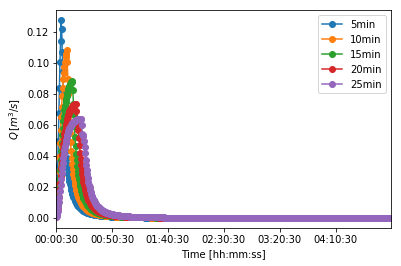

In [26]:
ax = all.plot(style="-o")
ax.set_xlabel('Time [hh:mm:ss]')
ax.set_ylabel(r'$Q\,\left[m^3/s\right]$')
ax.plot()

Si valuta il valore massimo di portata tra i massimi ottenuti per tempi diversi di pioggia e il relativo tempo critico

In [27]:
n_t1 = node['5min']
n_t2 = node['10min']
n_t3 = node['15min']
n_t4 = node['20min']
n_t5 = node['25min']

In [28]:
maxValues = [n_t1.max(), n_t2.max(), n_t3.max(), n_t4.max(), n_t5.max()]
maxValues

[0.12729300000000002, 0.107999, 0.08821799999999999, 0.073497, 0.063915]

Il valore massimo tra i tempi è $Q_{max}$ e vale

In [29]:
maxValue = max(maxValues)
maxValue

0.12729300000000002

cioè, in litri

In [31]:
maxValue * 1000

127.29300000000002

La sua posizione nel file dei massimi è:

In [32]:
maxValues.index(maxValue)

0

cioè è causata dalla precipitazione di **5min**.

Ora ci proponiamo di trovare il tempo in cui il massimo si realizza. Per fare questo dobbiamo considerare il primo dataFrame.

In [33]:
mask=(n_t1==n_t1.max())

In [34]:
n_t1[mask]

time
00:05:00    0.127293
Name: 5min, dtype: float64

Il tempo di pioggia critico risulta:

In [35]:
n_t1[mask].index

Index(['00:05:00'], dtype='object', name='time')

---